In [1]:
import time
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import psutil
from psutil import cpu_percent
from psutil import virtual_memory
import numpy as np

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


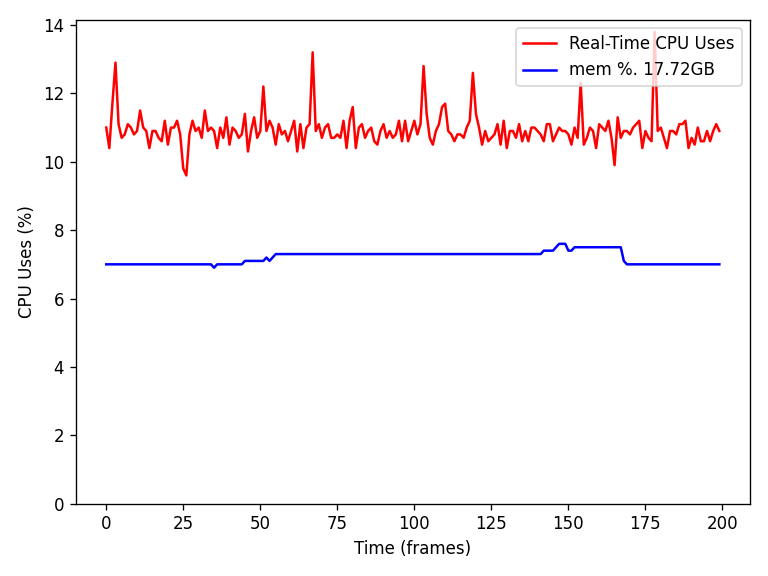

In [17]:
frame_len = 200
y = []
mem = []
def animate(i):
    y.append(cpu_percent())
    mem.append(virtual_memory().percent)
    abs_mem = round(virtual_memory().used/1000000000, 2)
    
    if len(y) <= frame_len:
        plt.cla()
        plt.plot(y, 'r', label = 'Real-Time CPU Uses')
        plt.plot(mem, 'b', label=f'mem %. {abs_mem}GB')
        
    else:
        y.pop(0), mem.pop(0)
        plt.cla()
        plt.plot(y[-frame_len:], 'r', label = 'Real-Time CPU Uses')
        plt.plot(mem, 'b', label=f'mem %. {abs_mem}GB')

#     plt.ylim(0,100)
    plt.ylim([0, None])
    plt.xlabel('Time (frames)')
    plt.ylabel('CPU Uses (%)')
    plt.legend(loc = 'upper right')
    plt.tight_layout()

ani = FuncAnimation(plt.gcf(), animate, interval=50)

In [5]:
import resource

In [6]:
[resource.getrusage(ii) for ii in range(2)]

[resource.struct_rusage(ru_utime=2143.141786, ru_stime=216.639253, ru_maxrss=108244, ru_ixrss=0, ru_idrss=0, ru_isrss=0, ru_minflt=5526369, ru_majflt=46, ru_nswap=0, ru_inblock=125408, ru_oublock=408, ru_msgsnd=0, ru_msgrcv=0, ru_nsignals=0, ru_nvcsw=4450251, ru_nivcsw=68141),
 resource.struct_rusage(ru_utime=2071.184324, ru_stime=178.841456, ru_maxrss=108244, ru_ixrss=0, ru_idrss=0, ru_isrss=0, ru_minflt=5510872, ru_majflt=46, ru_nswap=0, ru_inblock=123856, ru_oublock=88, ru_msgsnd=0, ru_msgrcv=0, ru_nsignals=0, ru_nvcsw=916613, ru_nivcsw=1922)]